In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [35]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [36]:
dataset_train.shape

(1258, 6)

In [37]:
training_set = dataset_train.iloc[:, 1:2].values

In [38]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [39]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [40]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
X_train.shape,y_train.shape

((1198, 60), (1198,))

In [43]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [44]:
X_train.shape

(1198, 60, 1)

In [45]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\Sachin\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [46]:
# Initialising the RNN
regressor = Sequential()

In [47]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [48]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [49]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0568
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0058
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================

Epoch 96/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015


In [52]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [54]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

In [58]:
real_stock_price.shape,dataset_total.shape

((20, 1), (1278,))

In [59]:
inputs = sc.transform(inputs)

In [60]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

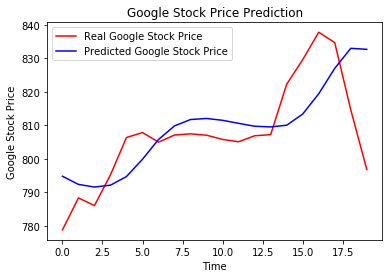

In [61]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
